In [1]:
# Start with a simple example, where we have an array of ages from 0 to 100

import numpy as np
import matplotlib.pyplot as plt

seafloor_ages = np.arange(0,100.5,1.)

seafloor_ages

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

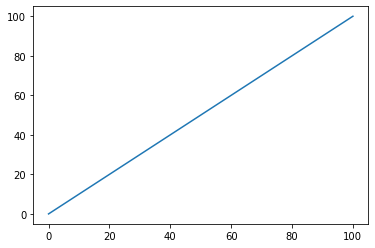

In [2]:
plt.plot(seafloor_ages)

In [3]:
# from the array of ages, we can get the expected depth based on Stein and Stein's paper

# Compute Stein & Stein [1992] depth-age curve
	# depth(t) =  365 * sqrt(t) + 2600,  t < 20 Myr
	#	   = 5651 - 2473 * exp (-0.0278*t), t > 20 Myr
    
SteinStein = 365. * np.sqrt(seafloor_ages) + 2600.

SteinStein


array([2600.        , 2965.        , 3116.18795027, 3232.19854476,
       3330.        , 3416.16481179, 3494.06375612, 3565.69922854,
       3632.37590053, 3695.        , 3754.23134596, 3810.56804848,
       3864.39708953, 3916.02621554, 3965.70494617, 4013.63892137,
       4060.        , 4104.93355335, 4148.5638508 , 4190.99811439,
       4232.32962357, 4272.64012866, 4312.00175234, 4350.47850601,
       4388.12751223, 4425.        , 4461.14212246, 4496.59563429,
       4531.39845708, 4565.5851546 , 4599.18733489, 4632.23399243,
       4664.75180106, 4696.76536599, 4728.29744162, 4759.36912083,
       4790.        , 4820.20832356, 4850.01111108, 4879.42426942,
       4908.46269192, 4937.14034666, 4965.47035492, 4993.46506137,
       5021.13609696, 5048.49443536, 5075.55044384, 5102.31392915,
       5128.79417905, 5155.        , 5180.93975133, 5206.62137642,
       5232.05243109, 5257.24010959, 5282.19126835, 5306.91244779,
       5331.40989234, 5355.68956887, 5379.75718364, 5403.61819

(6000.0, 2500.0)

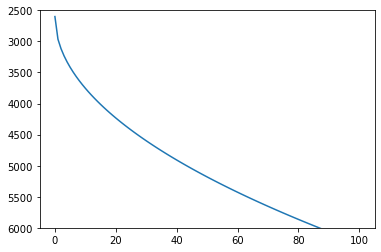

In [4]:
# Note, this is only the first part of the equation
plt.plot(seafloor_ages,SteinStein)
plt.ylim(6000,2500)

In [5]:
# Now we implement the second part, for places where the seafloor age is >20 Myr
SteinStein[seafloor_ages>20.] = 5651. - 2473 * np.exp(-0.0278 * seafloor_ages[seafloor_ages>20.]) 

SteinStein


array([2600.        , 2965.        , 3116.18795027, 3232.19854476,
       3330.        , 3416.16481179, 3494.06375612, 3565.69922854,
       3632.37590053, 3695.        , 3754.23134596, 3810.56804848,
       3864.39708953, 3916.02621554, 3965.70494617, 4013.63892137,
       4060.        , 4104.93355335, 4148.5638508 , 4190.99811439,
       4232.32962357, 4271.62294403, 4309.44151247, 4346.22320408,
       4381.99644704, 4416.78889013, 4450.62742408, 4483.53820234,
       4515.54666131, 4546.67754   , 4576.95489916, 4606.40213984,
       4635.04202152, 4662.89667966, 4689.98764285, 4716.33584942,
       4741.96166362, 4766.88489139, 4791.12479563, 4814.70011112,
       4837.62905897, 4859.92936074, 4881.6182521 , 4902.71249618,
       4923.2283965 , 4943.18180958, 4962.58815723, 4981.4624384 ,
       4999.81924083, 5017.67275232, 5035.03677165, 5051.9247193 ,
       5068.34964779, 5084.32425178, 5099.86087788, 5114.97153419,
       5129.66789957, 5143.96133271, 5157.86288085, 5171.38328

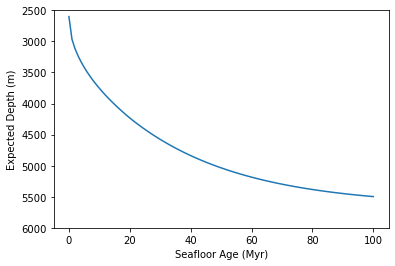

In [6]:
plt.plot(seafloor_ages,SteinStein)
plt.ylim(6000,2500)
plt.xlabel('Seafloor Age (Myr)')
plt.ylabel('Expected Depth (m)')
plt.show()

In [13]:
# We can follow the same method to get alternative estimates of age as a function of depth
# based on Parsons and Sclater

# Compute Parsons & Sclater [1977] depth-age curve
	# depth(t) =   350 * sqrt(t) + 2500, t < 70 Myr
	#	   =  6400 - 3200 exp (-t/62.8), t > 70 Myr
    
ParsonsSclater = 350. * np.sqrt(seafloor_ages) + 2500.
ParsonsSclater[seafloor_ages>70.] = 6400. - 3200. * np.exp(-seafloor_ages[seafloor_ages>70.]/62.8)

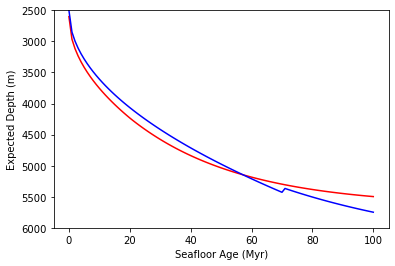

In [14]:
plt.plot(seafloor_ages,SteinStein, 'r')
plt.plot(seafloor_ages,ParsonsSclater, 'b')
plt.ylim(6000,2500)
plt.xlabel('Seafloor Age (Myr)')
plt.ylabel('Expected Depth (m)')
plt.show()

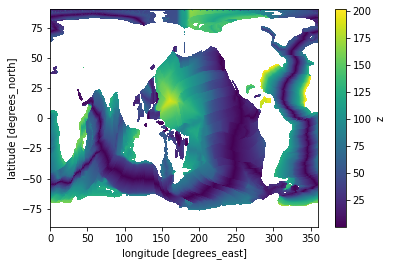

In [17]:
# Now we can try that on a map, which is basically a 2D array of numbers instead of a 1D array

# As an alternative to using GMT directly, we can load the numbers into python
# and use the same python commands to do the maths

import xarray as xr

seafloor_age_map = xr.open_dataarray('./Data/EarthByte_AREPS_Muller_etal_2016_AgeGrid.nc')

seafloor_age_map.plot()


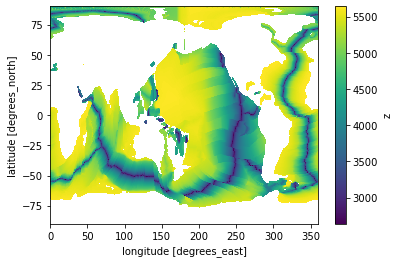

In [24]:
# This is basically the same as above, but the seafloor age array is 2D, not 1D
SteinStein = 365. * np.sqrt(seafloor_age_map) + 2600.
SteinStein.data[seafloor_age_map.data>20.] = 5651. - 2473 * np.exp(-0.0278 * seafloor_age_map.data[seafloor_age_map.data>20.]) 

SteinStein.plot()

In [30]:
# This command allows the result to be saved into a GMT-format grid (So that we can use the
# same GMT / pygmt commands on it as for other grids)
SteinStein.to_netcdf('./Data/SeafloorDepth_SteinStein.nc')


In [27]:
# code copied from previous grdtrack example
import pygmt
import os

grdfile = './Data/earth_relief_10m.nc'
profile_line_file = 'test.gmt'


def gmt_grdtrack(
    line_coordinates,
    gridfile,
    cross_track_width,
    along_track_spacing,
    cross_track_spacing):

    if type(line_coordinates) is str:
        cmd = 'gmt grdtrack %s -G%s -C%sk/%sk/%sk -Ar > table.txt' % \
            (line_coordinates,gridfile,cross_track_width,along_track_spacing,cross_track_spacing)
    else:
        np.savetxt('./.tmp.xy',line_coordinates)
        cmd = 'gmt grdtrack .tmp.xy -G%s -C%sk/%sk/%sk -Ar -: > table.txt' % \
            (gridfile,cross_track_width,along_track_spacing,cross_track_spacing)

    os.system(cmd)
    Xr=[]
    Yr=[]
    G=[]
    with open('./table.txt') as f:
        for line in f:
            if line[0] == '>':
                continue
            else:
                tmp = line.split()
                Xr.append(float(tmp[0]))
                Yr.append(float(tmp[1]))
                G.append(float(tmp[4]))
    
    ReshapeFactor = int((cross_track_spacing*cross_track_width)/(cross_track_spacing*along_track_spacing)+1)

    swath_longitudes = np.reshape(Xr,(int(len(Xr)/ReshapeFactor),ReshapeFactor))
    swath_latitudes = np.reshape(Yr,(int(len(Yr)/ReshapeFactor),ReshapeFactor))
    swath_zvalues = np.reshape(G,(int(len(G)/ReshapeFactor),ReshapeFactor))
    
    along_track_distance = np.arange(swath_zvalues.shape[0])*along_track_spacing
    
    return along_track_distance, swath_longitudes, swath_latitudes, swath_zvalues

In [41]:
cross_track_width = 60.
along_track_spacing = 2.
cross_track_spacing = 0.05

(along_track_distance, 
 swath_longitudes, 
 swath_latitudes, 
 swath_zvalues) = gmt_grdtrack(profile_line_file,
                               grdfile,
                               cross_track_width,
                               along_track_spacing,
                               cross_track_spacing)

(along_track_distance, 
 swath_longitudes, 
 swath_latitudes, 
 SteinStein_zvalues) = gmt_grdtrack(profile_line_file,
                               './Data/SeafloorDepth_SteinStein.nc',
                               cross_track_width,
                               along_track_spacing,
                               cross_track_spacing)



<ipython-input-40-9c23611f3812>:15: RuntimeWarning: Mean of empty slice
  fig.plot(x=along_track_distance, y=-np.nanmean(SteinStein_zvalues, axis=1),


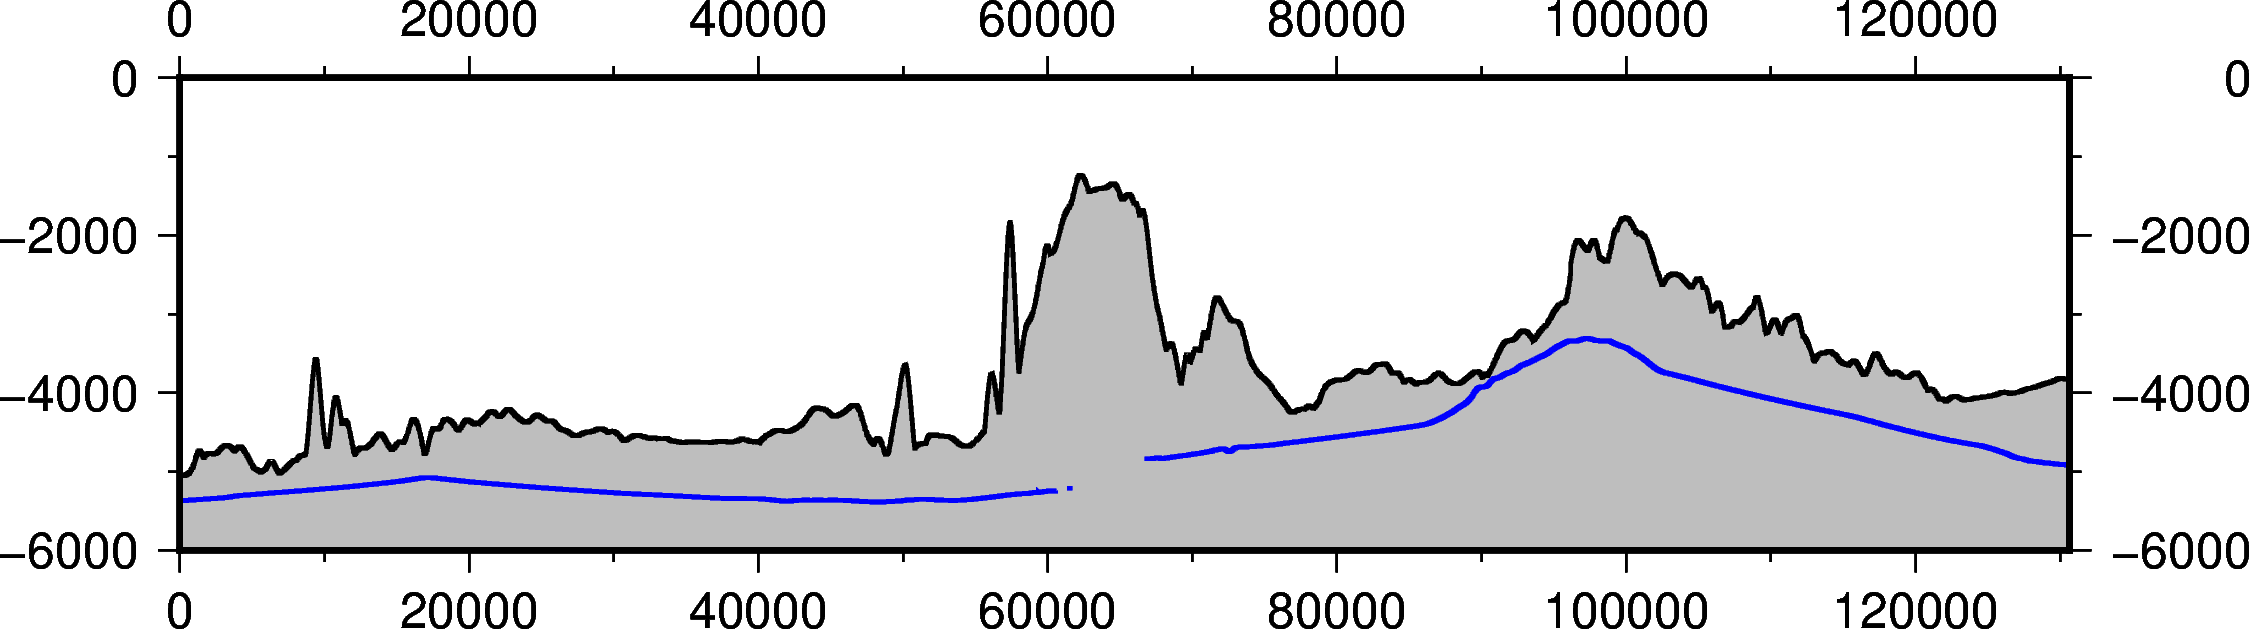

In [40]:
fig = pygmt.Figure()
fig.basemap(region = [0, along_track_distance.max(), -6000, 0], 
            projection='X16c/4c', frame=True)
fig.plot(x=np.hstack((along_track_distance[0],
                      along_track_distance,
                      along_track_distance[-1])),
         y=np.hstack((-10000,
                      np.nanmax(swath_zvalues, axis=1),
                      -10000)), 
         color='grey')
fig.plot(x=along_track_distance, y=np.nanmax(swath_zvalues, axis=1), 
         pen='1p,black')

# This line plots the profile of the 'Expected Depth' from Stein and Stein
fig.plot(x=along_track_distance, y=-np.nanmean(SteinStein_zvalues, axis=1), 
         pen='1p,blue')


fig.basemap(region = [0, along_track_distance.max(), -6000, 0], 
            projection='X16c/4c', frame=True)
fig.show(width=800)